In [5]:
#loading datase
import pandas as pd

customers = pd.read_csv("C:/Users/om wanjari/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/om wanjari/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/om wanjari/Downloads/Transactions.csv")

In [6]:
#1.UNDERSTANDING DATASETS
#find size of datasets
print(customers.shape)
print(products.shape)
print(transactions.shape)

(200, 4)
(100, 4)
(1000, 7)


In [10]:
#first rows
customers.head()
products.head()
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [14]:
#checking data types
customers.info()
products.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [15]:
#convering datatypes for proper analysis
#signupdate chaged from object -> datetime
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"]) 
#transactiondate changed from object -> datetime
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

In [20]:
#2.CLEANING DATA
#checking for duplicates
print("Duplicate Customers:", customers.duplicated().sum())
print("Duplicate Products:", products.duplicated().sum())
print("Duplicate Transactions:", transactions.duplicated().sum())


Duplicate Customers: 0
Duplicate Products: 0
Duplicate Transactions: 0


In [21]:
#checking for misssing values
print("Missing values in customers:\n", customers.isnull().sum())
print("Missing values in products:\n", products.isnull().sum())
print("Missing values in transactions:\n", transactions.isnull().sum())


Missing values in customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [26]:
#DATA IS ALREADY CLEAN 
#3.DESCRIPTIVE STATISTICS
print(transactions[['Quantity', 'TotalValue', 'Price']].describe())
print(products['Price'].describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [31]:
#merging data for better data analysis
merged_data = pd.merge(pd.merge(transactions, customers, on='CustomerID'), products, on='ProductID')

Region with Highest Sales
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64




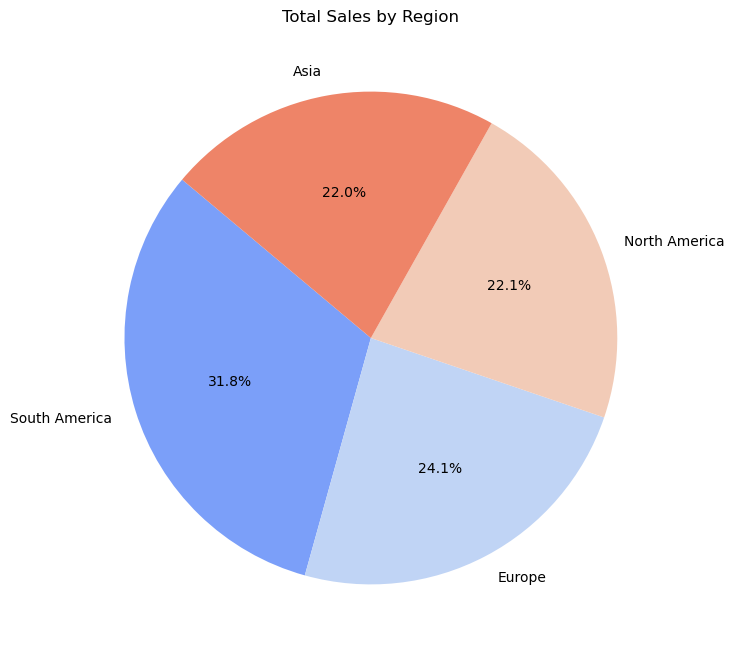

In [41]:
#Business Insights
import matplotlib.pyplot as plt
import seaborn as sns

#1.Region with Highest Sales
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Region with Highest Sales")
print(sales_by_region)
print("\n")

plt.figure(figsize=(8, 8))
colors = sns.color_palette("coolwarm", len(sales_by_region))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Total Sales by Region')
plt.show()


Top-Selling Products by Revenue
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64




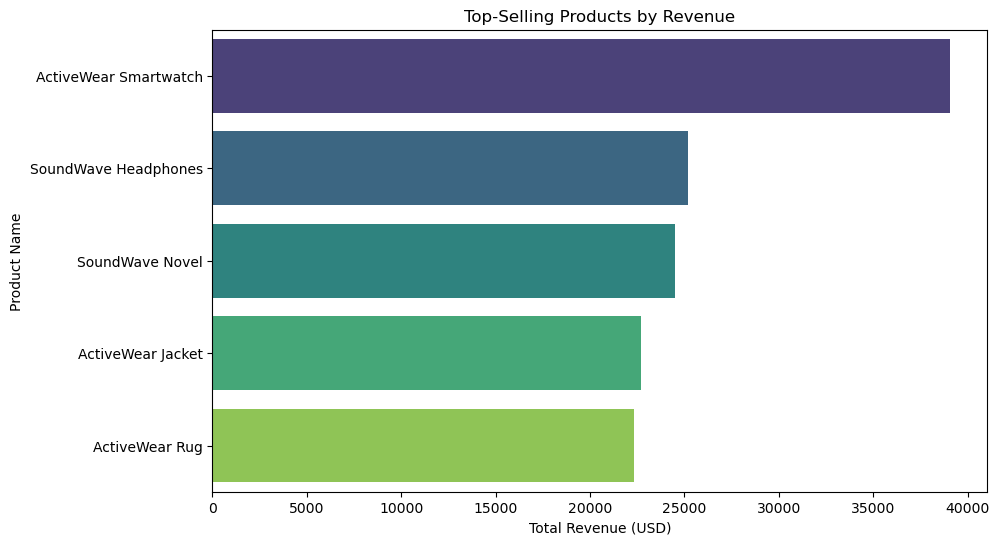

In [56]:
#2.Top-Selling Products by Revenue
top_products_by_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top-Selling Products by Revenue")
print(top_products_by_revenue)
print("\n")

# Insight 2: Top-Selling Products by Revenue (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_products_by_revenue.index, 
    x=top_products_by_revenue.values, 
    palette="viridis", 
    hue=top_products_by_revenue.index, 
)
plt.title('Top-Selling Products by Revenue')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product Name')
plt.show()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


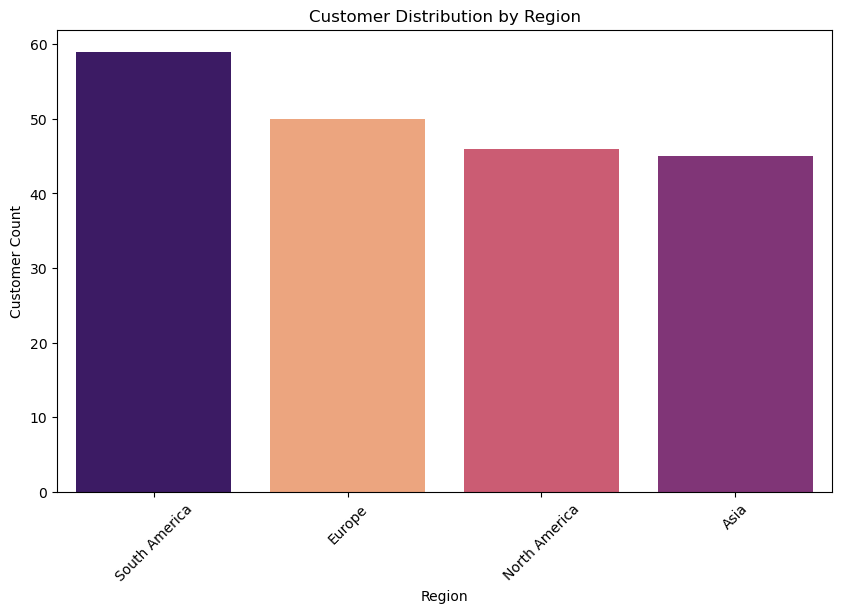

In [61]:
#3.analyze customer distribution by region 
region_counts = customers['Region'].value_counts()
print(region_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette="magma", order=customers['Region'].value_counts().index, hue = 'Region')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()

Product Category Performance
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64




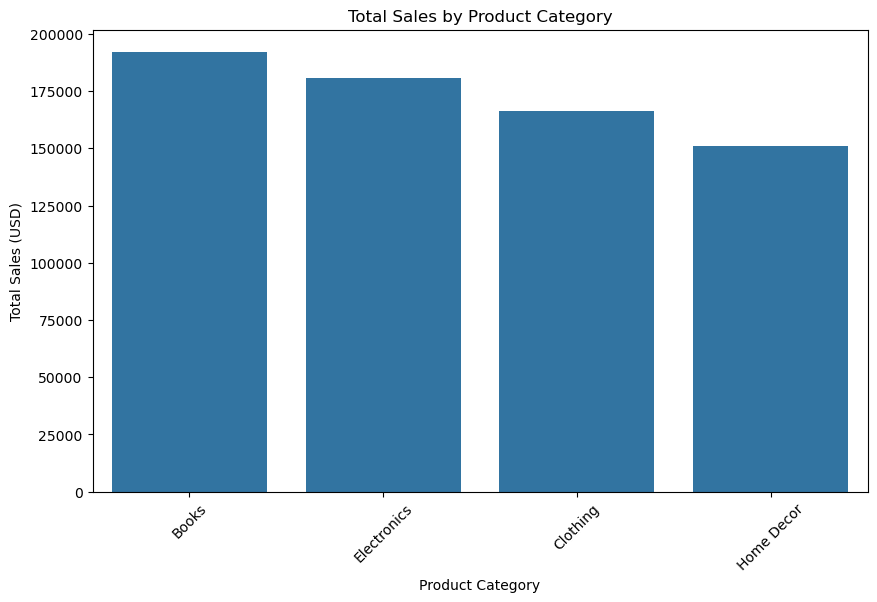

In [62]:
#4.Product Category Performance
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Product Category Performance")
print(sales_by_category)
print("\n")

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

Average Transaction Value Over Time
   TransactionMonth    AvgValue
0           2023-12  942.380000
1           2024-01  620.340093
2           2024-02  668.302208
3           2024-03  597.859125
4           2024-04  668.826279
5           2024-05  750.322558
6           2024-06  706.828696
7           2024-07  743.399896
8           2024-08  674.858936
9           2024-09  735.455729
10          2024-10  672.331714
11          2024-11  670.602982
12          2024-12  757.041026




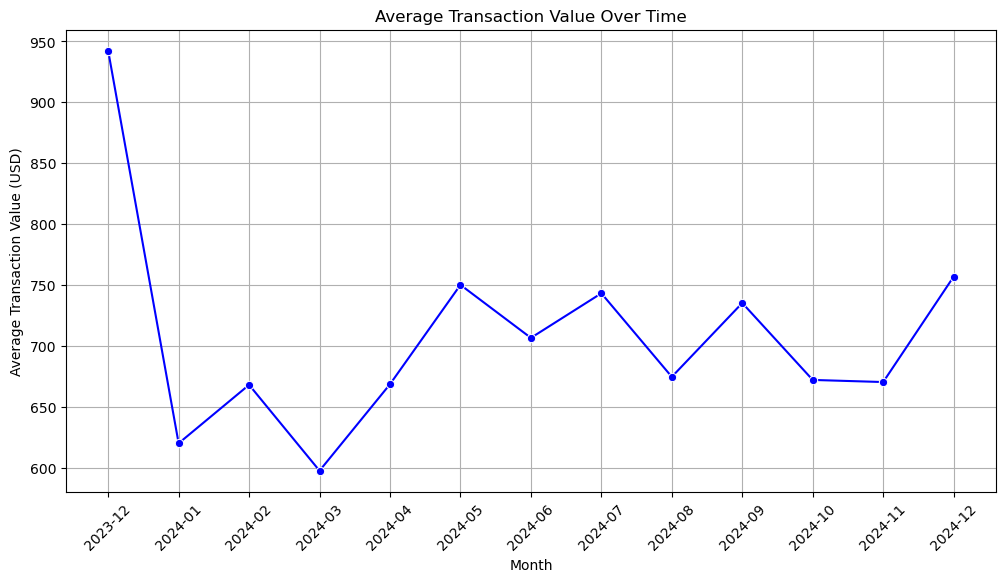

In [49]:
#5.Average Transaction Value Over Time
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
avg_transaction_value = transactions.groupby('TransactionMonth')['TotalValue'].mean().reset_index(name='AvgValue')
print("Average Transaction Value Over Time")
print(avg_transaction_value)
print("\n")

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_transaction_value['TransactionMonth'].astype(str), y=avg_transaction_value['AvgValue'], marker="o", color="b")
plt.title('Average Transaction Value Over Time')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()